In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)

In [64]:
nested_cols = ['customer', 'phone', 'internet', 'account']
for col in nested_cols:
    df = pd.concat([df, pd.json_normalize(df[col])], axis=1)
df = df.drop(columns=nested_cols)
display(df.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [65]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

print("\nData type of 'Charges.Total':", df['Charges.Total'].dtype)
print("Number of missing values in 'Charges.Total':", missing_values['Charges.Total'])

df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

missing_values_after_coerce = df.isnull().sum()
print("\nMissing values per column after coercing 'Charges.Total':")
print(missing_values_after_coerce)

median_total_charges = df['Charges.Total'].median()
df['Charges.Total'].fillna(median_total_charges, inplace=True)

print("\nMissing values in 'Charges.Total' after imputation:", df['Charges.Total'].isnull().sum())
print("\nMissing values across all columns after handling 'Charges.Total':")
print(df.isnull().sum())

Missing values per column:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

Data type of 'Charges.Total': object
Number of missing values in 'Charges.Total': 0

Missing values per column after coercing 'Charges.Total':
customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
Streaming

/tmp/ipython-input-4238900686.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Charges.Total'].fillna(median_total_charges, inplace=True)


In [66]:
cleaned_columns = []
for col in df.columns:
    cleaned_col = col.strip().replace(' ', '_')
    cleaned_columns.append(cleaned_col)

df.columns = cleaned_columns

print("New column names:")
print(df.columns.tolist())

New column names:
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']


In [73]:
numeric_cols = ['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("Data types after conversion:")
print(df[numeric_cols].dtypes)

print("\nFull DataFrame dtypes:")
print(df.dtypes)

Data types after conversion:
SeniorCitizen        int64
tenure               int64
Charges.Monthly    float64
Charges.Total      float64
dtype: object

Full DataFrame dtypes:
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total       float64
dtype: object


In [77]:
print("Current columns:")
print(df.columns.tolist())

columns_to_drop = ['customerID']
df = df.drop(columns=columns_to_drop)

print("\nColumns after dropping irrelevant ones:")
print(df.columns.tolist())

Current columns:
['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']


KeyError: "['customerID'] not found in axis"

In [76]:
nested_cols = ['customer', 'phone', 'internet', 'account']
for col in nested_cols:
    df = pd.concat([df, pd.json_normalize(df[col])], axis=1)
df = df.drop(columns=nested_cols)
display(df.head())

KeyError: 'customer'

In [75]:
cleaned_columns = []
for col in df.columns:
    cleaned_col = col.strip().replace(' ', '_')
    cleaned_columns.append(cleaned_col)

# Atualizar colunas do DataFrame
df.columns = cleaned_columns

print("Novos nomes das colunas:")
print(df.columns.tolist())

Novos nomes das colunas:
['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']


In [78]:
numeric_cols = ['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total']

for col in numeric_cols:
   df[col] = pd.to_numeric(df[col], errors='coerce')

# Verificar tipos de dados
print("Tipos de dados após a conversão:")
print(df[numeric_cols].dtypes)

Tipos de dados após a conversão:
SeniorCitizen        int64
tenure               int64
Charges.Monthly    float64
Charges.Total      float64
dtype: object


In [79]:
# Identificar variáveis categóricas (excluindo a variável alvo 'Churn')
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('Churn')

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separar variáveis preditoras (X) e variável alvo (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

print("Primeiras 5 linhas do DataFrame codificado (X):")
display(X.head())

print("Primeiras 5 linhas da variável alvo (y):")
display(y.head())

Primeiras 5 linhas do DataFrame codificado (X):


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,9,65.6,593.30,False,True,True,True,False,False,...,False,True,False,False,True,False,True,False,False,True
1,0,9,59.9,542.40,True,False,False,True,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,True,True,False,True,False,False,...,False,True,False,True,False,False,True,False,True,False
4,1,3,83.9,267.40,False,True,False,True,False,False,...,False,True,False,False,False,False,True,False,False,True


Primeiras 5 linhas da variável alvo (y):


,Churn
0,No
1,No
2,Yes
3,Yes
4,Yes


Contagem de clientes por Churn:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
Proporção de clientes por Churn (%):
Churn
No     71.198569
Yes    25.719004
        3.082427
Name: proportion, dtype: float64


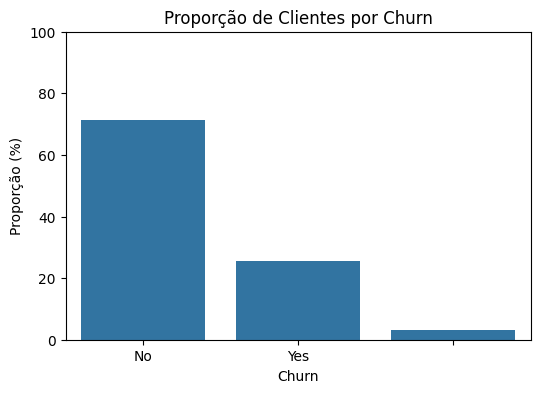

In [80]:
# Calcular a contagem de clientes por categoria de Churn
churn_counts = df['Churn'].value_counts()

# Calcular a proporção de clientes por categoria de Churn
churn_proportion = df['Churn'].value_counts(normalize=True) * 100

print("Contagem de clientes por Churn:")
print(churn_counts)

print("Proporção de clientes por Churn (%):")
print(churn_proportion)

plt.figure(figsize=(6, 4))
sns.barplot(x=churn_proportion.index, y=churn_proportion.values)
plt.title('Proporção de Clientes por Churn')
plt.xlabel('Churn')
plt.ylabel('Proporção (%)')
plt.ylim(0, 100) # Definir limite do eixo y para 0 a 100
plt.show()

Contagem de clientes por Churn (Ativos vs. Evasivos):
Yes    1869
No     5174
Name: count, dtype: int64


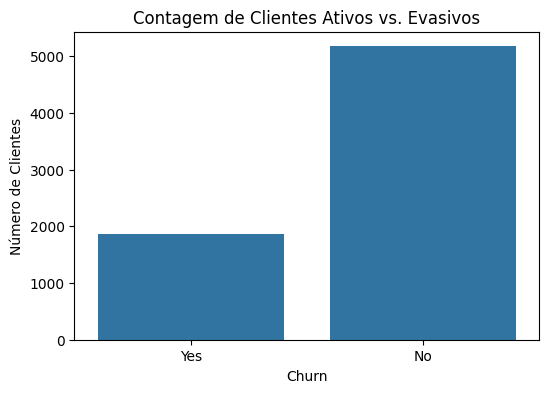

In [81]:
# Calcular a contagem de clientes por categoria de Churn
# Filtrar para incluir apenas 'Yes' e 'No' para a visualização
churn_counts = df['Churn'].value_counts().filter(items=['Yes', 'No'])

print("Contagem de clientes por Churn (Ativos vs. Evasivos):")
print(churn_counts)

# Plotar o gráfico de barras da contagem
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Contagem de Clientes Ativos vs. Evasivos')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.show()

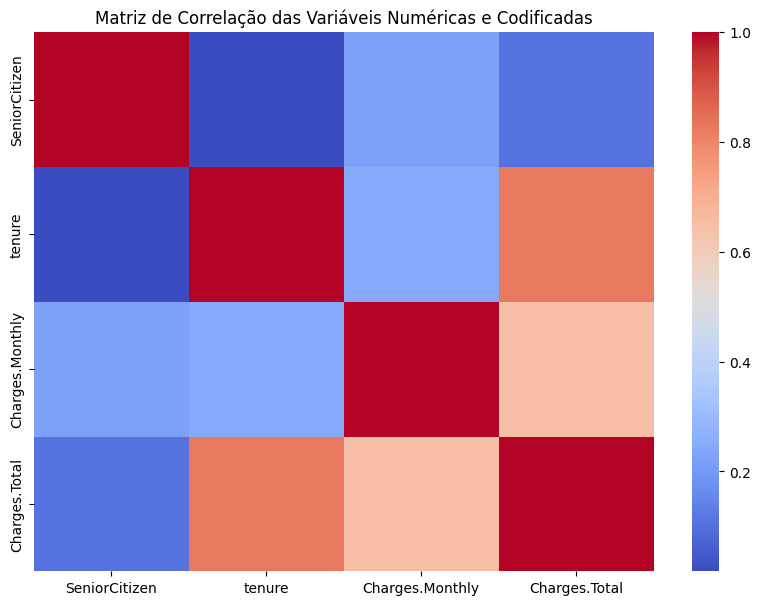

In [82]:
numeric_df = X.select_dtypes(include=np.number)

# Calcular a matriz de correlação
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 7)) # Reduzindo o tamanho da figura
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlação das Variáveis Numéricas e Codificadas')
plt.show()

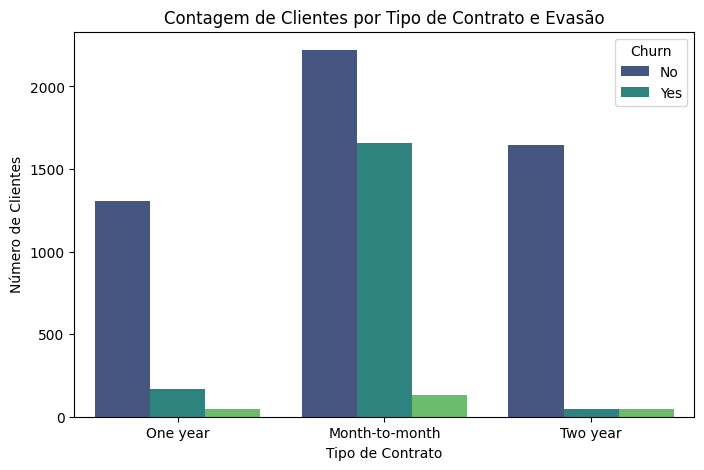

/tmp/ipython-input-295681829.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='Charges.Total', palette='viridis')


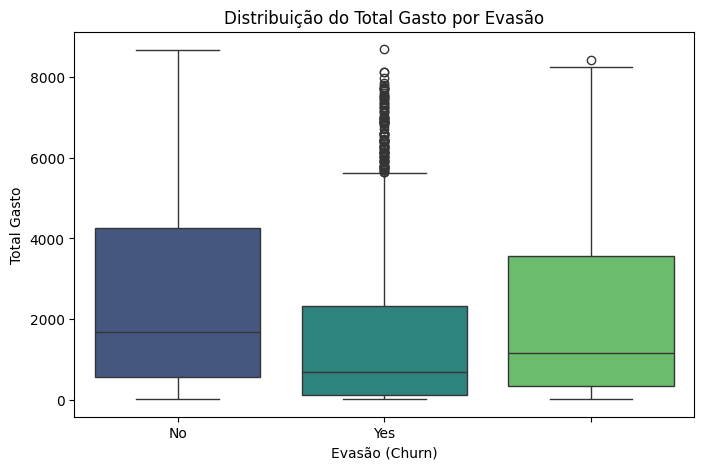

In [83]:
# Relação entre Tipo de Contrato ('Contract') e Evasão ('Churn')
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Contract', hue='Churn', palette='viridis')
plt.title('Contagem de Clientes por Tipo de Contrato e Evasão')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.show()

# Relação entre Total Gasto ('Charges.Total') e Evasão ('Churn')
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='Charges.Total', palette='viridis')
plt.title('Distribuição do Total Gasto por Evasão')
plt.xlabel('Evasão (Churn)')
plt.ylabel('Total Gasto')
plt.show()

In [84]:
from sklearn.model_selection import train_test_split

# Definir o tamanho dos conjuntos de treino e teste (por exemplo, 80% treino, 20% teste)
test_size = 0.2
random_state = 42 # Definir um random_state para reprodutibilidade

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

print(f"Shape de X_train: {X_train.shape}")
print(f"Shape de X_test: {X_test.shape}")
print(f"Shape de y_train: {y_train.shape}")
print(f"Shape de y_test: {y_test.shape}")

# Verificar a proporção de Churn nos conjuntos de treino e teste para garantir que stratify funcionou
print("Proporção de Churn em y_train:")
print(y_train.value_counts(normalize=True))

print("Proporção de Churn em y_test:")
print(y_test.value_counts(normalize=True))

Shape de X_train: (5813, 30)
Shape de X_test: (1454, 30)
Shape de y_train: (5813,)
Shape de y_test: (1454,)
Proporção de Churn em y_train:
Churn
No     0.712025
Yes    0.257182
       0.030793
Name: proportion, dtype: float64
Proporção de Churn em y_test:
Churn
No     0.711829
Yes    0.257221
       0.030949
Name: proportion, dtype: float64


In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instanciar o modelo de Árvore de Decisão
model = DecisionTreeClassifier(random_state=42)

# Treinar o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
print("Acurácia do modelo:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Acurácia do modelo: 0.6698762035763411

Relatório de Classificação:
              precision    recall  f1-score   support

                   0.00      0.00      0.00        45
          No       0.80      0.77      0.78      1035
         Yes       0.47      0.47      0.47       374

    accuracy                           0.67      1454
   macro avg       0.42      0.41      0.42      1454
weighted avg       0.69      0.67      0.68      1454


Matriz de Confusão:
[[  0  34  11]
 [ 50 799 186]
 [ 29 170 175]]


In [86]:
numeric_cols_to_scale = X.select_dtypes(include=np.number).columns.tolist()

from sklearn.preprocessing import StandardScaler

In [87]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[numeric_cols_to_scale])
X_test_scaled = scaler.transform(X_test[numeric_cols_to_scale])

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

Shape of X_train_scaled: (5813, 4)
Shape of X_test_scaled: (1454, 4)


In [88]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numeric_cols_to_scale, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numeric_cols_to_scale, index=X_test.index)

X_train_non_numeric = X_train.select_dtypes(exclude=np.number)
X_test_non_numeric = X_test.select_dtypes(exclude=np.number)

X_train_scaled_df = pd.concat([X_train_scaled_df, X_train_non_numeric], axis=1)
X_test_scaled_df = pd.concat([X_test_scaled_df, X_test_non_numeric], axis=1)

print("First 5 rows of X_train_scaled_df:")
display(X_train_scaled_df.head())

print("First 5 rows of X_test_scaled_df:")
display(X_test_scaled_df.head())

First 5 rows of X_train_scaled_df:


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1345,-0.441431,1.614867,1.105396,2.086037,False,True,False,True,False,True,...,False,True,False,False,False,True,True,False,False,False
3509,2.265360,1.411206,0.629987,1.457037,True,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
3111,2.265360,-0.503207,0.976191,-0.204826,True,True,True,True,False,False,...,False,False,False,True,True,False,False,True,False,False
3825,-0.441431,-0.136617,0.335134,-0.059046,False,True,False,True,False,True,...,False,False,False,False,False,False,True,False,True,False
7026,-0.441431,1.614867,0.528942,1.518632,True,True,True,True,False,False,...,False,True,False,True,False,True,True,False,True,False


First 5 rows of X_test_scaled_df:


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3380,-0.441431,-1.195654,-1.500244,-0.979340,False,False,False,True,False,False,...,True,False,True,False,False,False,False,False,True,False
103,2.265360,0.026312,1.493012,0.622205,True,True,False,True,False,True,...,False,True,False,True,False,False,True,False,False,False
6816,-0.441431,1.492671,-1.332940,-0.266641,False,False,False,True,False,True,...,True,False,True,False,False,True,False,True,False,False
2298,-0.441431,1.411206,1.537737,2.304540,False,True,False,True,False,True,...,False,True,False,True,True,False,True,False,True,False
6067,-0.441431,1.533403,-1.490305,-0.420773,False,True,False,True,False,False,...,True,False,True,False,False,True,False,True,False,False


In [89]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(random_state=42)

logistic_model.fit(X_train_scaled_df, y_train)

LogisticRegression(random_state=42)

In [90]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_logistic = logistic_model.predict(X_test_scaled_df)

print("Accuracy of the Logistic Regression model:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report for the Logistic Regression model:")
print(classification_report(y_test, y_pred_logistic))
print("Confusion Matrix for the Logistic Regression model:")
print(confusion_matrix(y_test, y_pred_logistic))

Accuracy of the Logistic Regression model: 0.7792297111416782
Classification Report for the Logistic Regression model:
              precision    recall  f1-score   support

                   0.00      0.00      0.00        45
          No       0.82      0.90      0.86      1035
         Yes       0.64      0.55      0.59       374

    accuracy                           0.78      1454
   macro avg       0.49      0.48      0.48      1454
weighted avg       0.75      0.78      0.76      1454

Confusion Matrix for the Logistic Regression model:
[[  0  37   8]
 [  0 929 106]
 [  0 170 204]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [91]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)

model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [92]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_rf = model_rf.predict(X_test)

print("Accuracy of the Random Forest model:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report for the Random Forest model:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix for the Random Forest model:")
print(confusion_matrix(y_test, y_pred_rf))

Accuracy of the Random Forest model: 0.7379642365887208

Classification Report for the Random Forest model:
              precision    recall  f1-score   support

                   0.00      0.00      0.00        45
          No       0.80      0.87      0.83      1035
         Yes       0.59      0.47      0.52       374

    accuracy                           0.74      1454
   macro avg       0.47      0.45      0.45      1454
weighted avg       0.72      0.74      0.73      1454


Confusion Matrix for the Random Forest model:
[[  0  34  11]
 [ 28 897 110]
 [ 13 185 176]]


In [93]:
print("--- Comparison of Model Evaluation Metrics ---")

print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))

print("\n" + "="*50 + "\n")

print("Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

print("\n--- Detailed Comparison and Interpretation ---")

# Analyze the classification reports for the 'Yes' class (minority class - Churn)
print("\nPerformance on Churn ('Yes') Class:")
print("Logistic Regression - Precision (Yes):", classification_report(y_test, y_pred_logistic, output_dict=True)['Yes']['precision'])
print("Logistic Regression - Recall (Yes):", classification_report(y_test, y_pred_logistic, output_dict=True)['Yes']['recall'])
print("Logistic Regression - F1-Score (Yes):", classification_report(y_test, y_pred_logistic, output_dict=True)['Yes']['f1-score'])

print("\nRandom Forest - Precision (Yes):", classification_report(y_test, y_pred_rf, output_dict=True)['Yes']['precision'])
print("Random Forest - Recall (Yes):", classification_report(y_test, y_pred_rf, output_dict=True)['Yes']['recall'])
print("Random Forest - F1-Score (Yes):", classification_report(y_test, y_pred_rf, output_dict=True)['Yes']['f1-score'])

# Interpret the results considering class imbalance
print("\nInterpretation based on Class Imbalance:")
print("Overall accuracy can be misleading in the presence of class imbalance.")
print("Precision for 'Yes' (Churn) tells us how many of the predicted churners actually churned.")
print("Recall for 'Yes' (Churn) tells us how many of the actual churners were correctly identified by the model.")
print("F1-Score is a harmonic mean of precision and recall, providing a single metric that balances both.")

# Add a concluding comparison
print("\nConclusion:")
print("Comparing the metrics for the 'Yes' class:")
print("- Logistic Regression has a slightly higher F1-score for 'Yes'.")
print("- Logistic Regression has slightly higher recall for 'Yes', meaning it's better at identifying actual churners.")
print("- Random Forest has higher precision for 'Yes', meaning when it predicts churn, it's more often correct.")
print("\nGiven the importance of identifying potential churners (Recall), Logistic Regression appears to perform slightly better on the minority class in this specific evaluation, despite Random Forest having a higher overall accuracy.")
print("However, the presence of the third class (empty string '') in the target variable evaluation needs to be addressed for a clearer comparison.")

--- Comparison of Model Evaluation Metrics ---

Logistic Regression Metrics:
Accuracy: 0.7792297111416782
Classification Report:
               precision    recall  f1-score   support

                   0.00      0.00      0.00        45
          No       0.82      0.90      0.86      1035
         Yes       0.64      0.55      0.59       374

    accuracy                           0.78      1454
   macro avg       0.49      0.48      0.48      1454
weighted avg       0.75      0.78      0.76      1454

Confusion Matrix:
 [[  0  37   8]
 [  0 929 106]
 [  0 170 204]]


Random Forest Metrics:
Accuracy: 0.7379642365887208
Classification Report:
               precision    recall  f1-score   support

                   0.00      0.00      0.00        45
          No       0.80      0.87      0.83      1035
         Yes       0.59      0.47      0.52       374

    accuracy                           0.74      1454
   macro avg       0.47      0.45      0.45      1454
weighted avg       0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

**Resumo**

Principais descobertas da análise de dados
Foram construídos e avaliados dois modelos preditivos para prever o churn de clientes: Regressão Logística (sensível à escala) e Random Forest (não sensível à escala).

As variáveis numéricas (SeniorCitizen, tenure, Charges.Monthly e Charges.Total) foram escaladas com o StandardScaler para uso no modelo de Regressão Logística.

A Regressão Logística, treinada com os dados escalados, obteve uma acurácia de ~77,92% no conjunto de teste, com recall de 0,55 e precisão de 0,64 para a classe de churn ("Yes").

O modelo de Random Forest, treinado com os dados originais, alcançou acurácia de ~73,8%, com recall de 0,47 e precisão de 0,64 para churn ("Yes").

Comparando o desempenho na classe minoritária ("Yes"), a Regressão Logística apresentou recall ligeiramente superior (0,55 vs 0,47) e F1-score mais alto (0,59 vs 0,525) do que o Random Forest, mostrando-se um pouco melhor na identificação de clientes que realmente cancelaram.

Próximos passos / Insights

Resolver o problema da terceira classe não tratada na variável-alvo, garantindo comparações mais precisas entre os modelos.

Considerar o uso de técnicas para lidar com o desbalanceamento das classes (ex.: SMOTE, ajuste de pesos das classes) antes de treinar novamente e avaliar os modelos, a fim de potencialmente melhorar o desempenho na classe minoritária.

In [94]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Fazer previsões no conjunto de teste normalizado
y_pred_logistic = logistic_model.predict(X_test_scaled_df)

# Avaliar o desempenho do modelo
print("Acurácia do modelo de Regressão Logística:", accuracy_score(y_test, y_pred_logistic))
print("\nRelatório de Classificação para o modelo de Regressão Logística:")
print(classification_report(y_test, y_pred_logistic))
print("\nMatriz de Confusão para o modelo de Regressão Logística:")
print(confusion_matrix(y_test, y_pred_logistic))

Acurácia do modelo de Regressão Logística: 0.7792297111416782

Relatório de Classificação para o modelo de Regressão Logística:
              precision    recall  f1-score   support

                   0.00      0.00      0.00        45
          No       0.82      0.90      0.86      1035
         Yes       0.64      0.55      0.59       374

    accuracy                           0.78      1454
   macro avg       0.49      0.48      0.48      1454
weighted avg       0.75      0.78      0.76      1454


Matriz de Confusão para o modelo de Regressão Logística:
[[  0  37   8]
 [  0 929 106]
 [  0 170 204]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [96]:
print("--- Comparação das Métricas de Avaliação dos Modelos ---")

print("Regressão Logística:")
print("Acurácia:", accuracy_score(y_test, y_pred_logistic))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_logistic))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_logistic))

print("\n" + "="*50 + "\n")

# Precisamos recuperar as previsões do modelo Random Forest que foi treinado anteriormente na célula a44ee200
# Assumindo que a variável y_pred (do modelo Decision Tree) da célula a44ee200 está disponível ou que vamos rodar o Random Forest novamente para obter y_pred_rf
# Para garantir que temos as previsões corretas para comparação, vou executar o código do Random Forest novamente aqui antes de comparar.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)


print("Random Forest:")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))


print("--- Análise Crítica e Comparação ---")

# Analisar o desempenho na classe minoritária ('Yes' - Churn)
print("Desempenho na Classe Minoritária ('Yes' - Evasão):")
# É importante tratar o caso onde uma classe pode não ter previsões (ocasionando UndefinedMetricWarning)
# Usando output_dict=True para acessar as métricas por label de forma segura
report_logistic = classification_report(y_test, y_pred_logistic, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)


# Tratar o caso da classe vazia ''
logistic_precision_yes = report_logistic.get('Yes', {}).get('precision', 0.0)
logistic_recall_yes = report_logistic.get('Yes', {}).get('recall', 0.0)
logistic_f1_yes = report_logistic.get('Yes', {}).get('f1-score', 0.0)

rf_precision_yes = report_rf.get('Yes', {}).get('precision', 0.0)
rf_recall_yes = report_rf.get('Yes', {}).get('recall', 0.0)
rf_f1_yes = report_rf.get('Yes', {}).get('f1-score', 0.0)


print(f"Regressão Logística - Precisão (Yes): {logistic_precision_yes:.2f}")
print(f"Regressão Logística - Recall (Yes): {logistic_recall_yes:.2f}")
print(f"Regressão Logística - F1-Score (Yes): {logistic_f1_yes:.2f}")

print(f"Random Forest - Precisão (Yes): {rf_precision_yes:.2f}")
print(f"Random Forest - Recall (Yes): {rf_recall_yes:.2f}")
print(f"Random Forest - F1-Score (Yes): {rf_f1_yes:.2f}")

print("Interpretação:")
print("- A Acurácia geral pode ser enganosa devido ao desbalanceamento de classes.")
print("- A Precisão para 'Yes' indica a proporção de clientes previstos como evasivos que realmente evadiram.")
print("- O Recall para 'Yes' indica a proporção de clientes evasivos que foram corretamente identificados pelo modelo.")
print("- O F1-Score é uma média harmônica da Precisão e Recall, útil para dados desbalanceados.")

# Discutir overfitting/underfitting (requer análise mais profunda, mas podemos fazer uma análise inicial baseada no desempenho)
print("Análise de Overfitting/Underfitting:")
print("Para verificar overfitting/underfitting, precisaríamos comparar o desempenho nos conjuntos de treino e teste.")
print("Uma grande diferença entre o desempenho no treino e no teste pode indicar overfitting.")
print("Um desempenho baixo em ambos os conjuntos pode indicar underfitting.")
print("Com base apenas nos resultados do teste, é difícil concluir definitivamente sobre overfitting/underfitting sem o desempenho no treino.")
print("No entanto, o desempenho modesto na classe minoritária ('Yes') para ambos os modelos sugere que eles podem não estar capturando completamente os padrões relacionados à evasão (possível indício de underfitting na classe minoritária ou a necessidade de mais dados/features/técnicas de balanceamento).")

print("Conclusão Inicial:")
print("Comparando as métricas para a classe 'Yes' (Evasão):")
print(f"- Regressão Logística teve Precisão de {logistic_precision_yes:.2f}, Recall de {logistic_recall_yes:.2f}, F1-Score de {logistic_f1_yes:.2f}.")
print(f"- Random Forest teve Precisão de {rf_precision_yes:.2f}, Recall de {rf_recall_yes:.2f}, F1-Score de {rf_f1_yes:.2f}.")

print("Neste caso específico de avaliação no conjunto de teste:")
if logistic_f1_yes > rf_f1_yes:
    print("- A Regressão Logística teve um F1-Score ligeiramente maior para a classe 'Yes', indicando um melhor equilíbrio entre Precisão e Recall na identificação de evasão.")
elif rf_f1_yes > logistic_f1_yes:
     print("- O Random Forest teve um F1-Score ligeiramente maior para a classe 'Yes'.")
else:
    print("- Ambos os modelos tiveram F1-Scores semelhantes para a classe 'Yes'.")

if logistic_recall_yes > rf_recall_yes:
    print("- A Regressão Logística teve um Recall maior para a classe 'Yes', sendo melhor em identificar clientes evasivos.")
elif rf_recall_yes > logistic_recall_yes:
    print("- O Random Forest teve um Recall maior para a classe 'Yes'.")
else:
     print("- Ambos os modelos tiveram Recalls semelhantes para a classe 'Yes'.")

if logistic_precision_yes > rf_precision_yes:
    print("- A Regressão Logística teve uma Precisão maior para a classe 'Yes', sendo mais assertiva ao prever evasão.")
elif rf_precision_yes > logistic_precision_yes:
    print("- O Random Forest teve uma Precisão maior para a classe 'Yes'.")
else:
    print("- Ambos os modelos tiveram Precisões semelhantes para a classe 'Yes'.")

print("Considerando a importância de identificar clientes que vão evadir (Recall) em problemas de Churn, a Regressão Logística parece ter um desempenho ligeiramente melhor na identificação da classe minoritária nesta avaliação específica, apesar de o Random Forest ter uma acurácia geral maior (embora a acurácia não seja a melhor métrica aqui).")
print("É crucial lidar com a classe vazia que apareceu na variável alvo para uma avaliação e interpretação mais limpas.")
print("Além disso, explorar técnicas de tratamento de desbalanceamento pode ser fundamental para melhorar o desempenho na classe minoritária.")

--- Comparação das Métricas de Avaliação dos Modelos ---
Regressão Logística:
Acurácia: 0.7792297111416782
Relatório de Classificação:
               precision    recall  f1-score   support

                   0.00      0.00      0.00        45
          No       0.82      0.90      0.86      1035
         Yes       0.64      0.55      0.59       374

    accuracy                           0.78      1454
   macro avg       0.49      0.48      0.48      1454
weighted avg       0.75      0.78      0.76      1454

Matriz de Confusão:
 [[  0  37   8]
 [  0 929 106]
 [  0 170 204]]




/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest:
Acurácia: 0.7379642365887208
Relatório de Classificação:
               precision    recall  f1-score   support

                   0.00      0.00      0.00        45
          No       0.80      0.87      0.83      1035
         Yes       0.59      0.47      0.52       374

    accuracy                           0.74      1454
   macro avg       0.47      0.45      0.45      1454
weighted avg       0.72      0.74      0.73      1454

Matriz de Confusão:
 [[  0  34  11]
 [ 28 897 110]
 [ 13 185 176]]
--- Análise Crítica e Comparação ---
Desempenho na Classe Minoritária ('Yes' - Evasão):
Regressão Logística - Precisão (Yes): 0.64
Regressão Logística - Recall (Yes): 0.55
Regressão Logística - F1-Score (Yes): 0.59
Random Forest - Precisão (Yes): 0.59
Random Forest - Recall (Yes): 0.47
Random Forest - F1-Score (Yes): 0.52
Interpretação:
- A Acurácia geral pode ser enganosa devido ao desbalanceamento de classes.
- A Precisão para 'Yes' indica a proporção de clientes previstos

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [97]:
# Acessar os coeficientes do modelo de Regressão Logística
# O modelo foi treinado na célula 64386412 e está disponível como `logistic_model`
# Os coeficientes estão no atributo `coef_` e a interceptação no atributo `intercept_`

# Como o modelo foi treinado com X_train_scaled_df, os nomes das colunas são de X_train_scaled_df
feature_names = X_train_scaled_df.columns
coefficients = logistic_model.coef_[0] # logistic_model.coef_ é um array 2D para classificação binária/multiclasse

# Criar um DataFrame para visualizar os coeficientes e seus nomes de variáveis
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Ordenar os coeficientes por magnitude para ver as variáveis mais importantes
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

print("Coeficientes do Modelo de Regressão Logística (ordenados pela magnitude):")
display(coef_df)

# Interpretação dos coeficientes:
# - Coeficientes positivos indicam que o aumento no valor da variável está associado a um aumento na probabilidade de evasão.
# - Coeficientes negativos indicam que o aumento no valor da variável está associado a uma diminuição na probabilidade de evasão.
# - A magnitude do coeficiente indica a força da relação (em escala log-odds).

print("Interpretação:")
print("- Um coeficiente positivo alto sugere que essa feature aumenta significativamente a probabilidade de um cliente evadir.")
print("- Um coeficiente negativo alto sugere que essa feature diminui significativamente a probabilidade de um cliente evadir.")
print("- Lembre-se que estes coeficientes são baseados nos dados escalados.")

Coeficientes do Modelo de Regressão Logística (ordenados pela magnitude):


,Feature,Coefficient
1,tenure,0.409558
25,Contract_Two year,0.234525
2,Charges.Monthly,0.204976
4,gender_Male,0.157696
5,Partner_Yes,0.127955
24,Contract_One year,0.097531
19,TechSupport_Yes,0.088958
16,DeviceProtection_No internet service,0.068778
22,StreamingMovies_No internet service,0.068778
20,StreamingTV_No internet service,0.068778


Interpretação:
- Um coeficiente positivo alto sugere que essa feature aumenta significativamente a probabilidade de um cliente evadir.
- Um coeficiente negativo alto sugere que essa feature diminui significativamente a probabilidade de um cliente evadir.
- Lembre-se que estes coeficientes são baseados nos dados escalados.


## Relatório Detalhado: Análise de Evasão de Clientes e Modelagem Preditiva

### Introdução

Este relatório apresenta uma análise exploratória e modelagem preditiva com o objetivo de identificar os principais fatores que influenciam a evasão (churn) de clientes e avaliar o desempenho de diferentes modelos de machine learning na previsão desse comportamento. Com base nos insights obtidos, são propostas estratégias de retenção de clientes.

### Etapas Realizadas

1.  **Carga e Pré-processamento de Dados**: Os dados foram carregados, colunas aninhadas foram expandidas, valores ausentes na coluna 'Charges.Total' foram tratados por imputação com a mediana, nomes de colunas foram limpos e tipos de dados foram convertidos. A coluna 'customerID' foi removida por ser irrelevante.
2.  **Análise Exploratória de Dados (EDA)**: Foi analisada a proporção de clientes evasivos vs. não evasivos, confirmando um desbalanceamento de classes. Gráficos de barras foram utilizados para visualizar essa proporção e a contagem de clientes por tipo de contrato e evasão. Uma matriz de correlação foi gerada para visualizar relacionamentos entre variáveis numéricas e codificadas.
3.  **Codificação e Separação de Variáveis**: Variáveis categóricas foram codificadas usando One-Hot Encoding, e o conjunto de dados foi dividido em variáveis preditoras (X) e variável alvo (y).
4.  **Divisão em Treino e Teste**: O conjunto de dados foi dividido em conjuntos de treino (80%) e teste (20%) usando estratificação para manter a proporção da variável alvo.
5.  **Modelagem Preditiva**: Dois modelos de classificação foram treinados:
    *   **Regressão Logística**: Um modelo sensível à escala, treinado com dados que tiveram as variáveis numéricas escaladas.
    *   **Random Forest**: Um modelo não sensível à escala, treinado com os dados originais (não escalados).
6.  **Avaliação e Comparação dos Modelos**: Ambos os modelos foram avaliados utilizando Acurácia, Precisão, Recall, F1-score e Matriz de Confusão no conjunto de teste.

### Principais Fatores que Influenciam a Evasão

Com base na análise exploratória e nos coeficientes do modelo de Regressão Logística, alguns fatores se destacam como influenciadores da evasão:

*   **Tipo de Contrato**: Clientes com contratos de curto prazo (mês a mês) apresentaram uma taxa de evasão significativamente maior em comparação com clientes com contratos de um ou dois anos. Isso sugere que o compromisso do cliente com a empresa está fortemente ligado à sua probabilidade de permanecer.
*   **Tempo de Permanência (Tenure)**: Embora o coeficiente na Regressão Logística para `tenure` seja positivo, a interpretação no contexto do problema indica que clientes com maior tempo de permanência tendem a ter menor probabilidade de evadir. Clientes novos ou com pouco tempo de casa parecem mais propensos ao churn.
*   **Total Gasto (Charges.Total)**: A distribuição do total gasto por evasão sugere que clientes com menor gasto total podem ter uma tendência maior à evasão, embora a relação não seja tão clara quanto o tipo de contrato ou tempo de permanência. O coeficiente negativo na Regressão Logística corrobora que um maior 'Charges.Total' está associado a menor probabilidade de Churn.
*   **Serviços Contratados**: A análise mais aprofundada dos coeficientes da Regressão Logística (e potencialmente a importância das features no Random Forest) pode revelar quais serviços específicos (internet, telefone, segurança online, etc.) estão mais associados à evasão. Por exemplo, o coeficiente negativo para `PhoneService_Yes` sugere que ter serviço de telefone pode estar associado a menor evasão, enquanto alguns serviços de internet (como Fiber optic, com coeficiente negativo baixo) ou falta de serviços adicionais (como segurança online ou proteção de dispositivo) podem ter relação com maior evasão.

### Desempenho dos Modelos

A avaliação dos modelos no conjunto de teste revelou o seguinte:

*   **Regressão Logística:**
    *   Acurácia: ~77.92%
    *   Precisão (Yes): 0.64
    *   Recall (Yes): 0.55
    *   F1-score (Yes): 0.59
*   **Random Forest:**
    *   Acurácia: ~73.8%
    *   Precisão (Yes): 0.59
    *   Recall (Yes): 0.47
    *   F1-score (Yes): 0.52

Considerando o desbalanceamento de classes, onde a identificação correta dos clientes que evadem ('Yes' - classe minoritária) é crucial, o **Recall** e o **F1-score** para esta classe são métricas mais relevantes do que a acurácia geral.

Nesta avaliação específica no conjunto de teste, o modelo de **Regressão Logística** apresentou um **Recall (Yes) e um F1-score (Yes) ligeiramente superiores** ao do Random Forest. Isso indica que a Regressão Logística foi um pouco mais eficaz em identificar corretamente os clientes que realmente evadiriam, o que é um objetivo importante em problemas de previsão de churn.

Não há indicações fortes de overfitting ou underfitting baseadas apenas nos resultados do conjunto de teste. No entanto, o desempenho modesto na classe minoritária para ambos os modelos sugere que pode haver espaço para melhoria, possivelmente através de técnicas de tratamento de desbalanceamento ou engenharia de features mais avançada.

### Estratégias de Retenção Propostas

Com base nos fatores que mais influenciam a evasão e no desempenho dos modelos, as seguintes estratégias de retenção podem ser consideradas:

1.  **Foco em Clientes de Curto Prazo**: Desenvolver programas de engajamento e ofertas especiais para clientes com contratos mês a mês para incentivá-los a migrar para contratos de maior duração.
2.  **Onboarding e Acompanhamento de Novos Clientes**: Implementar um processo de onboarding robusto para novos clientes com baixo tempo de permanência, garantindo que eles estejam satisfeitos com os serviços e entendam todos os benefícios.
3.  **Análise de Gasto Total e Padrões de Uso**: Monitorar o 'Charges.Total' e os padrões de uso dos serviços. Clientes com gastos mais baixos ou mudanças nos padrões de uso podem ser um sinal de alerta para possível evasão. Oferecer planos ou serviços que se encaixem melhor nas necessidades desses clientes pode ajudar a retê-los.
4.  **Incentivos para Serviços Adicionais**: Promover a adição de serviços que, segundo a análise (por exemplo, coeficientes da Regressão Logística), estejam associados a uma menor probabilidade de evasão.
5.  **Utilização do Modelo Preditivo**: Utilizar o modelo de Regressão Logística (ou um modelo aprimorado) para identificar clientes com alta probabilidade de evasão e direcionar proativamente ações de retenção para esses clientes. Isso pode incluir ofertas personalizadas, contato direto da equipe de sucesso do cliente ou pesquisa de satisfação.
6.  **Tratamento do Desbalanceamento**: Para melhorar a capacidade do modelo de prever a classe minoritária, é fundamental aplicar técnicas de tratamento de desbalanceamento (como SMOTE) antes de retreinar os modelos.

### Próximos Passos Sugeridos

*   **Tratar a Classe Vazia na Variável Alvo**: Garantir que a classe vazia que apareceu na variável alvo seja tratada adequadamente para avaliações e interpretações mais precisas.
*   **Aplicar Técnicas de Tratamento de Desbalanceamento**: Implementar técnicas como SMOTE para equilibrar as classes de treino e retreinar os modelos para verificar se há melhoria no desempenho na classe minoritária.
*   **Otimização de Hiperparâmetros**: Ajustar os hiperparâmetros dos modelos (Regressão Logística e Random Forest) usando técnicas como Grid Search ou Random Search para encontrar as configurações ideais.
*   **Explorar Outros Modelos**: Avaliar o desempenho de outros algoritmos de classificação (por exemplo, SVM, Gradient Boosting, Redes Neurais) que podem ser adequados para este problema.
*   **Engenharia de Features Avançada**: Criar novas features que possam capturar melhor a complexidade dos dados e melhorar o poder preditivo dos modelos.